In [48]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#assign reading the csv file to the variable df_train and same with test
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')


In [3]:
#show the columns of train (the file meant to train our machine learning algorithm)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#we'd like to get a vague idea of the general features of all the data we have so we can start with a little description of all variables
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#the ultimate goal of this entire project is to track the price of a house based on its features, so we use .describe to give us 
#stats about saleprice, our current goal to is show features about the data which this will help with
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#now we can get an idea of what variables are numerical and which are categorical 
numrFeat = df_train.select_dtypes(include=[np.number])
catrFeat = df_train.select_dtypes(include=[np.object])
print('Numerical Features:\n',numrFeat.dtypes,'\n')
print('Numerical Features:\n',numrFeat.dtypes,'\n')

Numerical Features:
 Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 

Numerical Fea

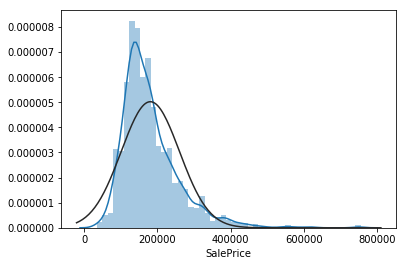

In [7]:
#to make this more digestable and give us an easier way to see the data and its features, we're going to use seaborn's distplot
#function which plots a graph to show the distribution of data, a histogram basically. 
sns.distplot(df_train['SalePrice'], fit=norm);

In [8]:
#here we're printing the skewness and kurtosis of the data. skew means it shows how far to the left or right of the
#center the peak is, while kurtosis shows the shape of the graph. a kurtosis of 3 means it's a smooth normal distribution
#a higher kurtosis gives sharp peaks and steep tails, with lower giving the opposite. 0 is the skewness for normal distribution
#with negative meaning its skewed left, positive skews right. skew and kurt are scipy functions
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness: 0.121347


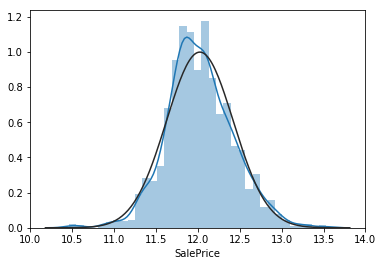

In [9]:
#to get a more normal distribution we can take the log and even it out
df_train['SalePrice'] = np.log1p(df_train['SalePrice']) #might use log instead of log1p in the future
sns.distplot(df_train['SalePrice'], fit=norm);
print("Skewness: %f" % df_train['SalePrice'].skew())

In [10]:
#now that we know we can get saleprice to a normal distribution by getting its log, lets return to its original value for simplicity's sake
#in finding what values correlate with it heavily, e.g house size, as they will be focused by the machine learning algorithm
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

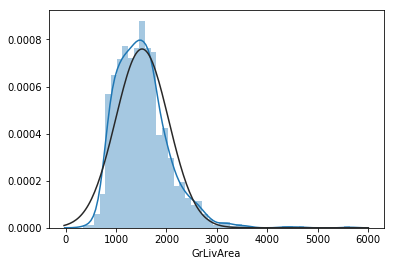

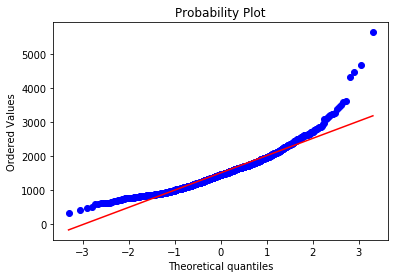

In [11]:
#GrLivArea is very significant so we want to make sure it's normal
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [12]:
#it's not so we do what we did with SalePrice
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])

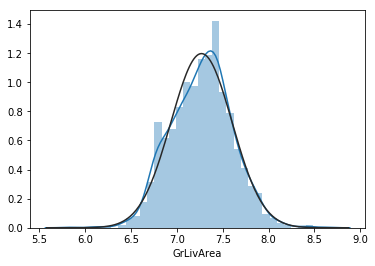

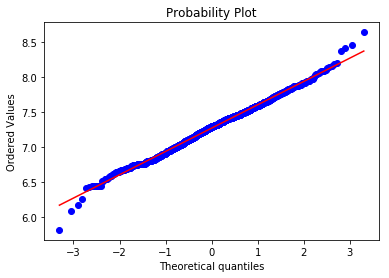

In [13]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

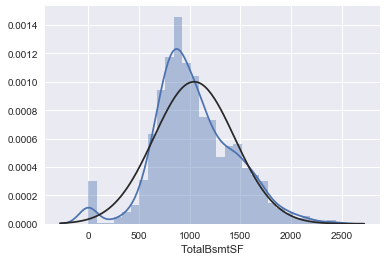

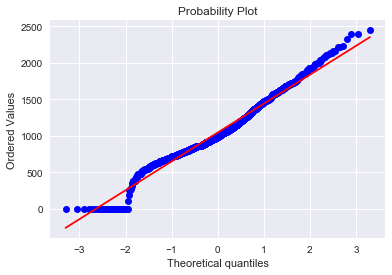

In [43]:
#do the same to totalbsmtsf
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

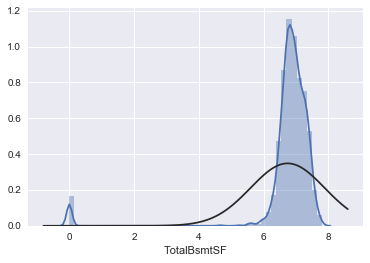

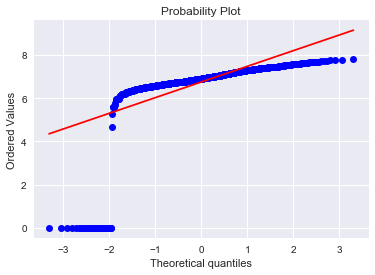

In [44]:
#this ugly guy is a bit more complex, this is what it looks like when we try to log it 
sns.distplot(np.log1p(df_train['TotalBsmtSF']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log1p(df_train['TotalBsmtSF']), plot=plt)

In [45]:
#this does not help AT ALL, good thing i didn't overwrite the original values, what we can do isntead is make a binary categorical feature
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [46]:
#don't need to draw this, we can just transform  the data with log1p
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])

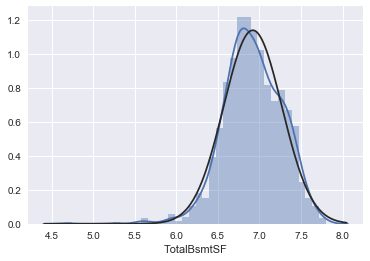

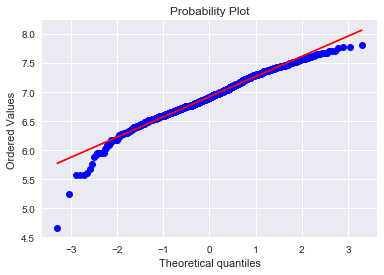

In [47]:
#it's not perfect but it'll do
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

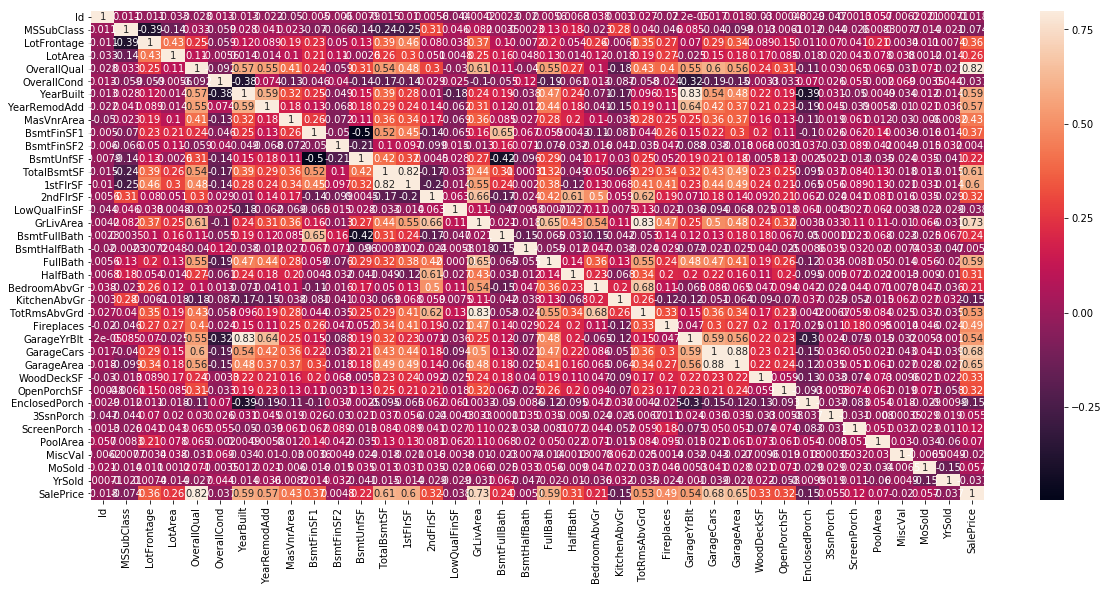

In [14]:
#in order to get a broad idea of correlations and visualise this, 
#we can use a fat correlation heatmap AKA correlation matrix, its use here is very general 
#and just for the sake of getting an idea of where to delve deeper
corrhmap = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9)) 
sns.heatmap(corrhmap, vmax=.8, annot=True);

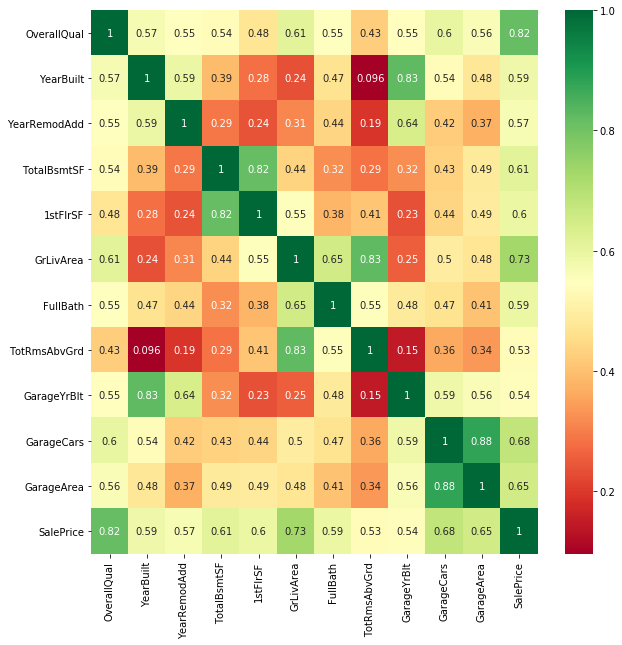

In [15]:
#thats okay to see the general landscape of how many features are correlated 
#with salesprice and how they correlate with each other but if we want 
#more relevant features only (lets say with a correlation of >0.5 with salesprice)
corrhmap = df_train.corr()
top_corr_features = corrhmap.index[abs(corrhmap["SalePrice"])>0.5] #creating a variable for the most correlated features
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn") #rdylgn is the colour scale for the heatmap, always tricks me looking back on it 

In [16]:
#we are now going to show salesprice's relationship with variables that are numerical (e.g their entries are just numbers)
print("NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

NUMERICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


here are some pretty strong linear relationships we saw from our correlation list


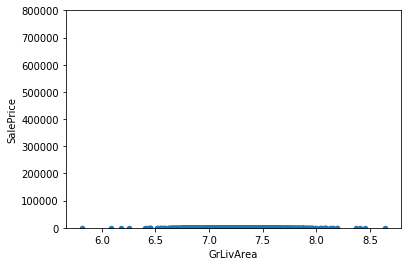

In [17]:
comparVar = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html
data.plot.scatter(x=comparVar, y='SalePrice', ylim=(0,800000));
print('here are some pretty strong linear relationships we saw from our correlation list')
#this is how it's done with matlib but i prefer to use seaborn, which is why the graph will be repeated the next cell and all future graphs will be drawn using seaborn i just wanted to show how to do it with matlib

In [18]:
print('observed relationship is linear')

observed relationship is linear


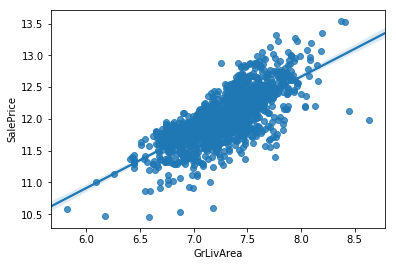

In [19]:
sns.regplot('GrLivArea','SalePrice',data=df_train);

to get a clearer idea of the relationship we can eliminate outliers by eyeballing it


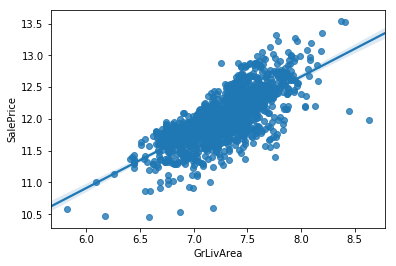

In [20]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
sns.regplot('GrLivArea','SalePrice',data=df_train);
print('to get a clearer idea of the relationship we can eliminate outliers by eyeballing it')

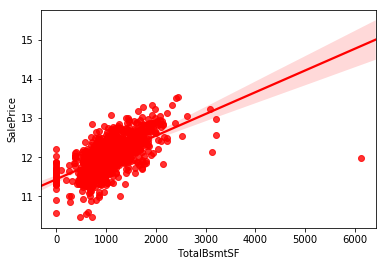

In [21]:
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');


here we apply the same process to show some more linear relationships with saleprice


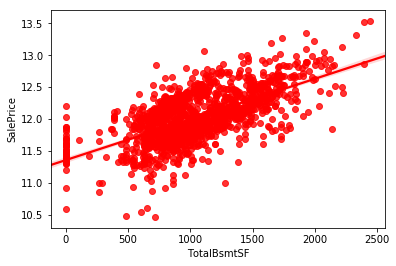

In [22]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>2500) & (df_train['SalePrice']<300000)].index)
sns.regplot('TotalBsmtSF','SalePrice',data=df_train, color='red');
print('here we apply the same process to show some more linear relationships with saleprice')

In [23]:
print('can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.')


can be 0, it seems to have a dense, strong linear relationship at around 1000 on the x axis.


here the anomalies have already been eliminated


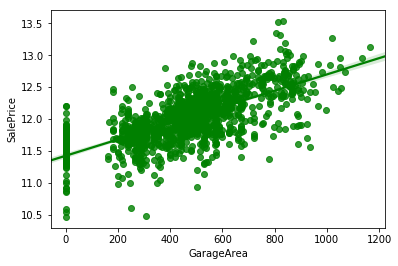

In [24]:
df_train = df_train[df_train['GarageArea']<1200]
sns.regplot('GarageArea','SalePrice',data=df_train,color='green');
print('here the anomalies have already been eliminated')

here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation
note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' 


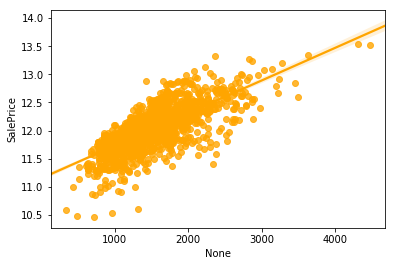

In [25]:
print('here an interesting concept can be shown, that by adding two variables together we can get a very strong correlation')
sns.regplot(df_train['1stFlrSF'] + df_train['2ndFlrSF'],df_train['SalePrice'], color='orange');
print("note: the axis is the combination of '1stFlrSF' & '2ndFlrSF' ")

In [26]:
#now we do a box plot for things that are categorical e.g the only values the variable can have are predetermined e.g housecolor 
#would only be red blue or green
print("CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE")

CATEGORICAL VARIABLE RELATIONSHIPS WITH SALESPRICE


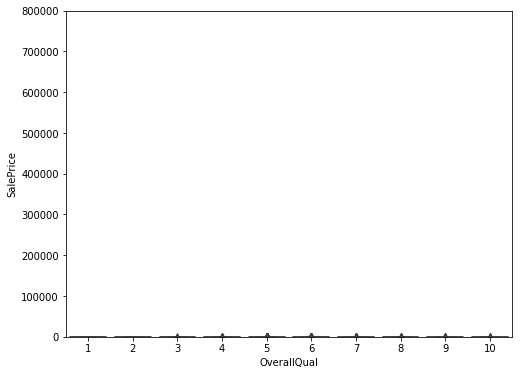

In [27]:
#this at a glance should be obvious that as overallqual goes up, so does salesprice, this is plotted via boxplot
comparVar = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000); #note: i might draw graphs with different functions just to show the capabilities of the different libraries in use

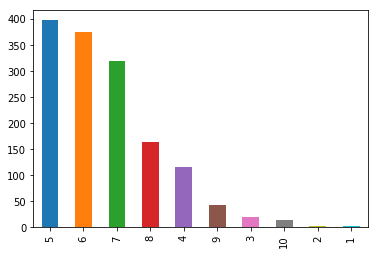

In [28]:
df_train['OverallQual'].value_counts().plot(kind="bar");

this shows the total rooms above ground, an issue arises as the sample size increases though


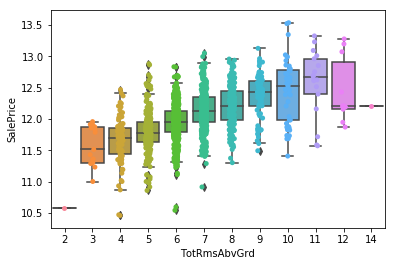

In [29]:
sns.boxplot(df_train['TotRmsAbvGrd'], df_train['SalePrice']);
sns.stripplot(df_train["TotRmsAbvGrd"],df_train["SalePrice"], jitter=True)
print('this shows the total rooms above ground, an issue arises as the sample size increases though')

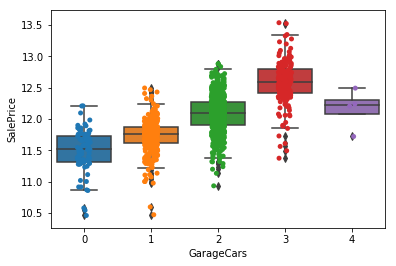

In [30]:
sns.boxplot(df_train['GarageCars'], df_train['SalePrice']);
sns.stripplot(df_train["GarageCars"],df_train["SalePrice"], jitter=True)

we need a bar graph to show why 4 gives us such an odd value for saleprice


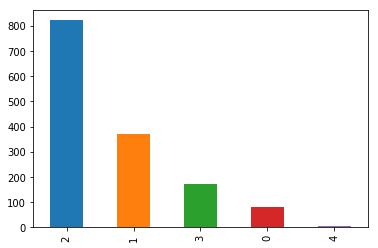

In [31]:
print('we need a bar graph to show why 4 gives us such an odd value for saleprice')
df_train['GarageCars'].value_counts().plot(kind="bar");

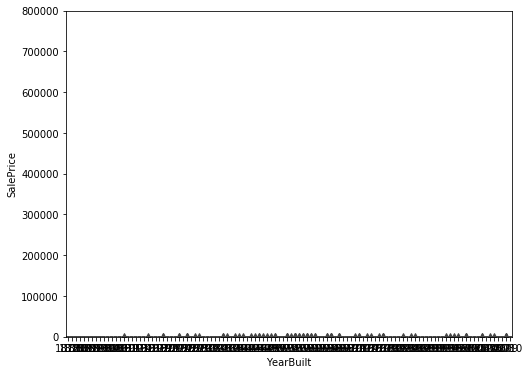

In [32]:
#now we're checking when the house was built
comparVar = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[comparVar]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=comparVar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [33]:
print('its hard to determine the exact relationship but generally, the newer the more expensive')

its hard to determine the exact relationship but generally, the newer the more expensive


showing correlated variables and their relationships


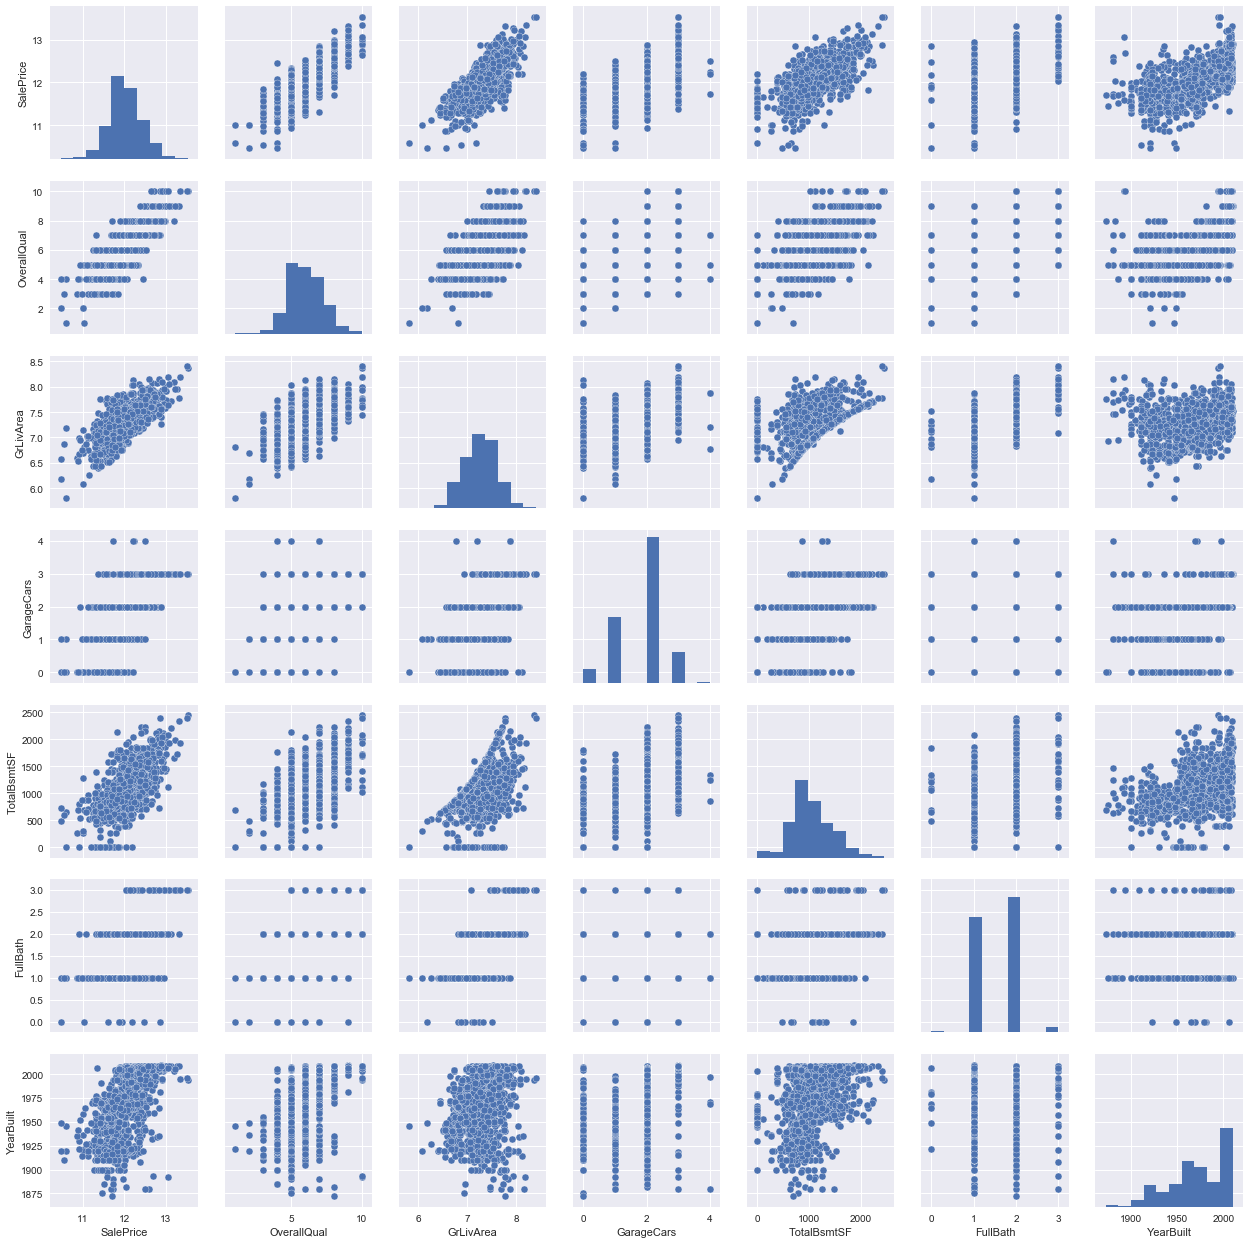

In [34]:
#okay this is a bit crazy, but it's essentially a grid of graphs
print('showing correlated variables and their relationships')
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [35]:
#we can now start making some dummy features for each existing categorical feature 
#dummy features are when you have categorical features and turn every possible state 
#into its own feature e.g if you have ConditionOfHouse, its dummy features would be 
#ConditionOfHouse_Good, ConditionOfHouse_Bad and it takes values of 0 or 1 
#which makes it numeric

In [36]:
#observe missing values for numeric features
total = numrFeat.isnull().sum().sort_values(ascending=False)
percent = (numrFeat.isnull().sum()/numrFeat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
BsmtUnfSF,0,0.000000


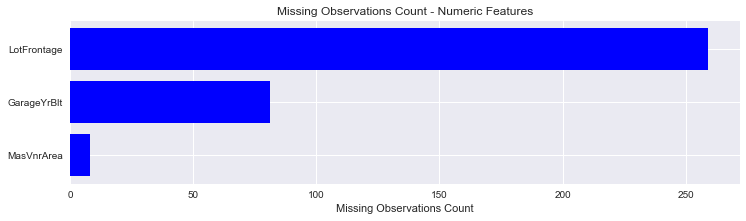

In [37]:
#we can now create a visulalisation for this
missing_values = numrFeat.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [38]:
#rinse and repeat for catergorical features
total = catrFeat.isnull().sum().sort_values(ascending=False)
percent = (catrFeat.isnull().sum()/catrFeat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


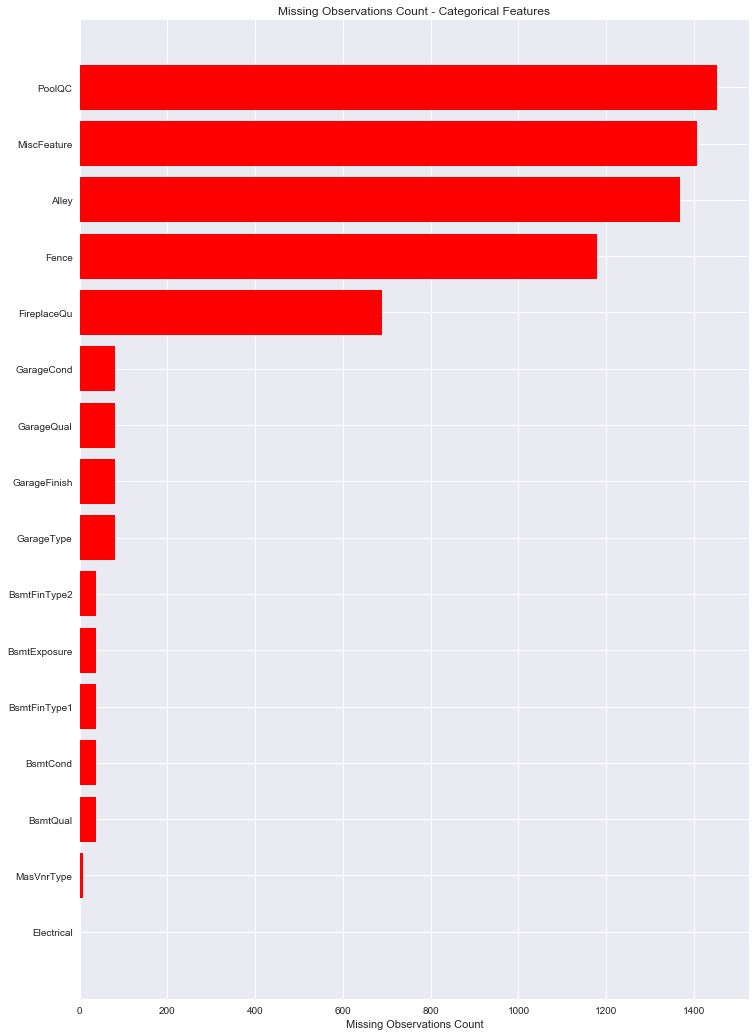

In [39]:
missing_values = catrFeat.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

In [40]:
#we want to highlight stuff that is hard to account into houseprice because 
#it contains a lot of null values

total = df_train.isnull().sum().sort_values(ascending=False) #sum all the null vals and sort it descendingly 
perc = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) #express this as a percentage
missing_data = pd.concat([total, perc], axis=1, keys=['Total', 'Percent'])
missing_data.head(20) #using pandas we make the last 2 calculated figures into a table for every column

,Total,Percent
PoolQC,1443,0.995859
MiscFeature,1396,0.963423
Alley,1358,0.937198
Fence,1169,0.806763
FireplaceQu,689,0.475500
LotFrontage,256,0.176674
GarageCond,81,0.055901
GarageType,81,0.055901
GarageYrBlt,81,0.055901
GarageFinish,81,0.055901


In [41]:
#now we can drop some variables
#after analysing all the variables with missing values we can conclude they're all susceptible to outliers and generally don't help the data in anyway so we can drop them as well
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [42]:
print("NOTE: I AM UNSURE IF THIS IS THE CORRECT APPROACH AND ONCE WE START TESTING AND SEEING OUR SCORES IT MIGHT BE BETTTER TO IMPUTE THE MISSING VARIABLES INSTEAD OF JUST DELETING THEM, https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard IF WE DECIDE TO IMPUTE USE THIS FOR REFERENCE")

NOTE: I AM UNSURE IF THIS IS THE CORRECT APPROACH AND ONCE WE START TESTING AND SEEING OUR SCORES IT MIGHT BE BETTTER TO IMPUTE THE MISSING VARIABLES INSTEAD OF JUST DELETING THEM, https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard IF WE DECIDE TO IMPUTE USE THIS FOR REFERENCE


In [52]:
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1013, 64)
X_test : (435, 64)
y_train : (1013,)
y_test : (435,)


In [55]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [56]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

ValueError: could not convert string to float: 'Normal'